# Data Project -Stock Market Analysis

In this notebook we will be looking at data from the stock market, particularly some technoloy sotkcs. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory(LSTM) method!

We'll be answering the following questions along the way:
```
1.) What was the change in price of the stock over time? (Basic)
2.) What was the daily return of the stock on average? (Basic Summary)
3.) What was the moving average of the various stocks? ()
4.) What was the correlation between different stocks'? ()
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future sotck behavior? (Predicting the closing price sotck price of APPLE inc using LSTM)

```

# 1. What was the change in price of the stock overtime?
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

from pandas_datareader.data import DataReader

from datetime import datetime

In [10]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)


                   High          Low         Open        Close   Volume  \
Date                                                                      
2020-09-02  3552.250000  3486.689941  3547.000000  3531.449951  3931500   
2020-09-03  3488.409912  3303.000000  3485.000000  3368.000000  8161100   
2020-09-04  3381.500000  3111.129883  3318.000000  3294.620117  8781800   
2020-09-08  3250.850098  3130.000000  3144.000000  3149.840088  6094200   
2020-09-09  3303.179932  3185.000000  3202.989990  3268.610107  5188700   
...                 ...          ...          ...          ...      ...   
2021-08-27  3352.320068  3313.750000  3333.229980  3349.629883  2391300   
2021-08-30  3445.000000  3355.219971  3357.429932  3421.570068  3192200   
2021-08-31  3472.580078  3395.590088  3424.800049  3470.790039  4356400   
2021-09-01  3527.000000  3475.239990  3496.399902  3479.000000  3629900   
2021-09-02  3511.959961  3455.000000  3494.760010  3463.120117  2923700   

              Adj Close 

In [14]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis = 0)
df.tail(10)


,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-08-20,3207.810059,3175.760010,3203.870117,3199.949951,3341200.0,3199.949951,AMAZON
2021-08-23,3280.899902,3210.010010,3211.899902,3265.870117,3268100.0,3265.870117,AMAZON
2021-08-24,3315.489990,3274.580078,3280.000000,3305.780029,2551800.0,3305.780029,AMAZON
2021-08-25,3321.000000,3286.149902,3309.870117,3299.179932,1680300.0,3299.179932,AMAZON
2021-08-26,3332.000000,3296.000000,3299.000000,3316.000000,2098800.0,3316.000000,AMAZON
2021-08-27,3352.320068,3313.750000,3333.229980,3349.629883,2391300.0,3349.629883,AMAZON
2021-08-30,3445.000000,3355.219971,3357.429932,3421.570068,3192200.0,3421.570068,AMAZON
2021-08-31,3472.580078,3395.590088,3424.800049,3470.790039,4356400.0,3470.790039,AMAZON
2021-09-01,3527.000000,3475.239990,3496.399902,3479.000000,3629900.0,3479.000000,AMAZON


In [16]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,130.302056,127.279367,128.852965,128.806838,1.048905e+08,128.377954
std,10.874507,11.195686,10.966954,11.110956,4.259085e+07,11.267551
min,110.190002,103.099998,104.540001,106.839996,4.639770e+07,106.157211
25%,122.059998,118.959999,120.500000,120.709999,7.649920e+07,120.145607
50%,128.710007,126.320000,127.779999,127.349998,9.435980e+07,127.159477
75%,136.389999,133.610001,135.580002,134.839996,1.201509e+08,134.358719
max,154.979996,152.399994,153.869995,153.649994,3.326072e+08,153.649994


In [17]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-09-02 to 2021-09-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          253 non-null    float64
 1   Low           253 non-null    float64
 2   Open          253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    float64
 5   Adj Close     253 non-null    float64
 6   company_name  253 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


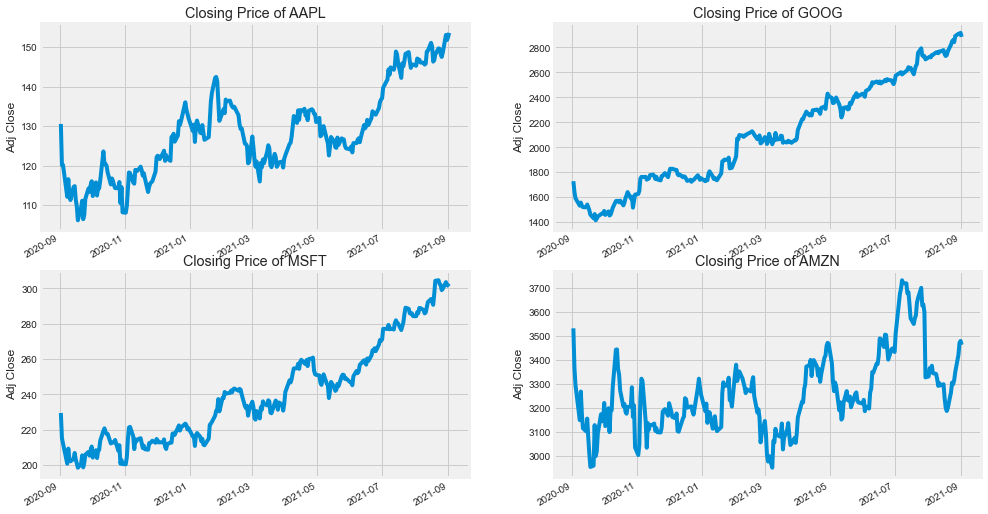

In [18]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f'Closing Price of {tech_list[i - 1]}')

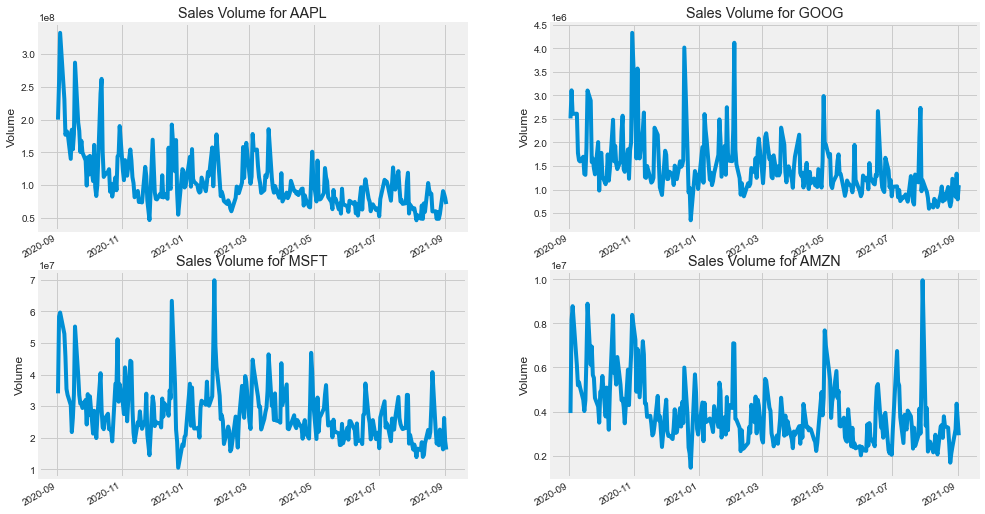

In [19]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f'Sales Volume for {tech_list[i - 1]}')

## What was the moving average of the various stocks?

In [21]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

                  High         Low        Open       Close       Volume  \
Date                                                                      
2020-09-02  137.979996  127.000000  137.589996  131.399994  200119000.0   
2020-09-03  128.839996  120.500000  126.910004  120.879997  257599600.0   
2020-09-04  123.699997  110.889999  120.070000  120.959999  332607200.0   
2020-09-08  118.989998  112.680000  113.949997  112.820000  231366600.0   
2020-09-09  119.139999  115.260002  117.260002  117.320000  176940500.0   
...                ...         ...         ...         ...          ...   
2021-08-27  148.750000  146.830002  147.479996  148.600006   55721500.0   
2021-08-30  153.490005  148.610001  149.000000  153.119995   90956700.0   
2021-08-31  152.800003  151.289993  152.660004  151.830002   86453100.0   
2021-09-01  154.979996  152.339996  152.830002  152.509995   80313700.0   
2021-09-02  154.720001  152.399994  153.869995  153.649994   71115500.0   

             Adj Close c

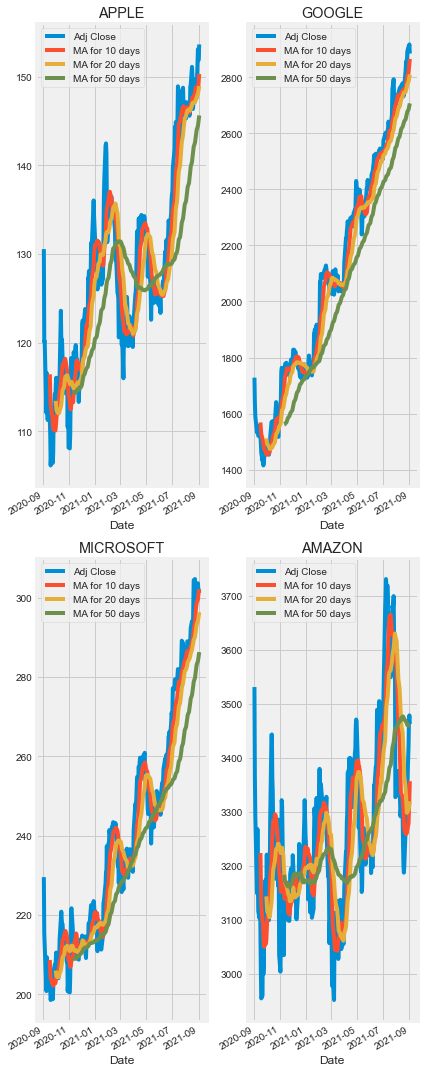

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figheight(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## 3. What was the daily return of the stock on average?

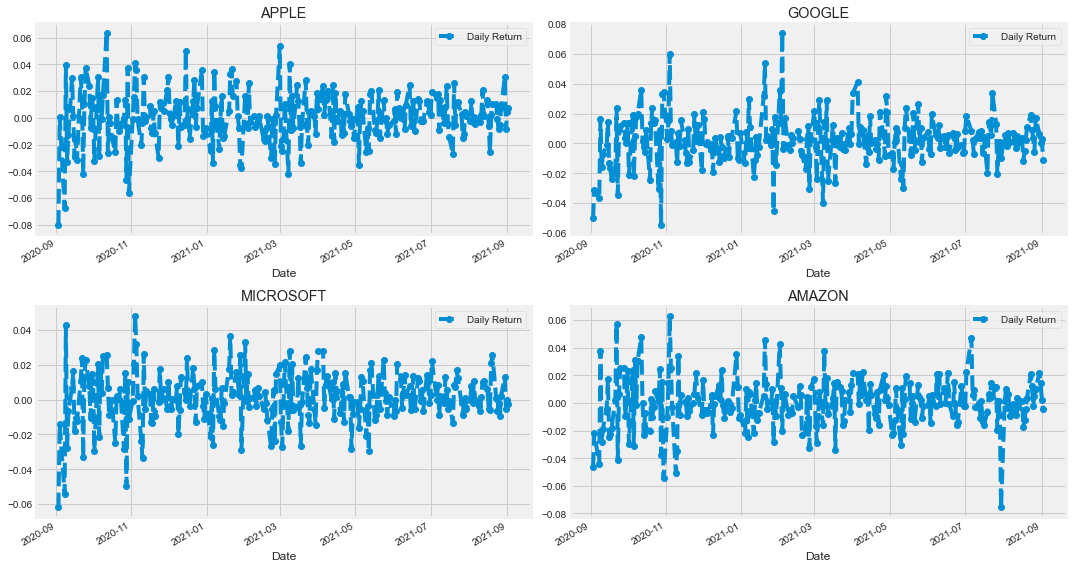

In [27]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

/Users/goodtool/.pyenv/versions/3.8.1/envs/jupyter/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/goodtool/.pyenv/versions/3.8.1/envs/jupyter/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/goodtool/.pyenv/versions/3.8.1/envs/jupyter/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

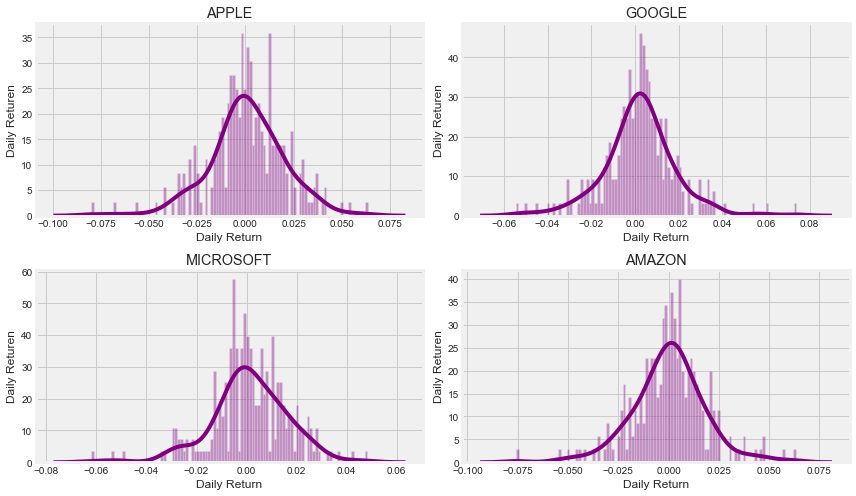

In [34]:
plt.figure(figsize=(12,7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Returen')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## What was the correlation between different stocks closign prices

In [35]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-09-02,130.560257,1728.280029,229.543701,3531.449951
2020-09-03,120.107483,1641.839966,215.324188,3368.000000
2020-09-04,120.186981,1591.040039,212.301926,3294.620117
2020-09-08,112.098999,1532.390015,200.817307,3149.840088
2020-09-09,116.570236,1556.959961,209.368820,3268.610107


In [36]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-09-02,NaN,NaN,NaN,NaN
2020-09-03,-0.080061,-0.050015,-0.061947,-0.046284
2020-09-04,0.000662,-0.030941,-0.014036,-0.021787
2020-09-08,-0.067295,-0.036863,-0.054096,-0.043944
2020-09-09,0.039887,0.016034,0.042584,0.037707


/Users/goodtool/.pyenv/versions/3.8.1/envs/jupyter/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


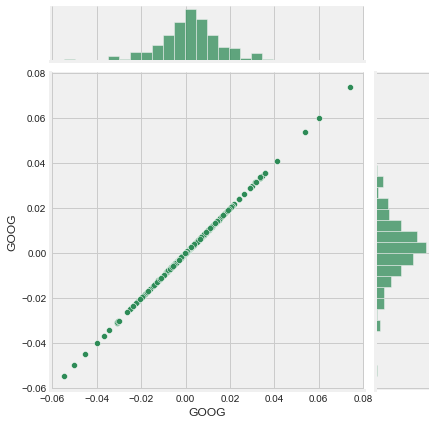

In [39]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

/Users/goodtool/.pyenv/versions/3.8.1/envs/jupyter/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


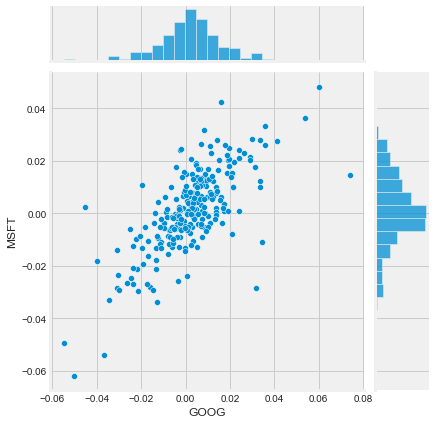

In [41]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

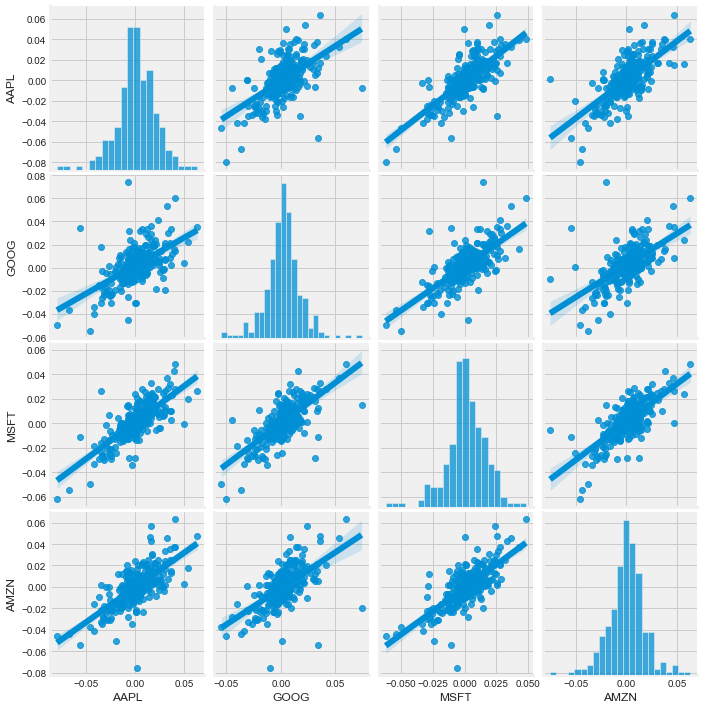

In [44]:
sns.pairplot(tech_rets, kind='reg')

Symbols,AAPL,GOOG,MSFT,AMZN
Symbols,,,,
AAPL,1.000000,0.575408,0.756358,0.697164
GOOG,0.575408,1.000000,0.715348,0.609100
MSFT,0.756358,0.715348,1.000000,0.734920
AMZN,0.697164,0.609100,0.734920,1.000000


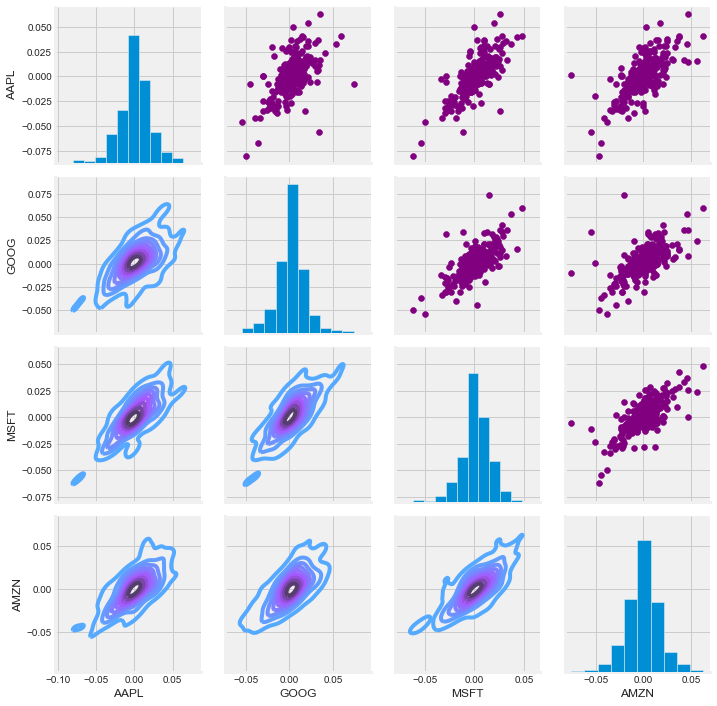

In [93]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=10)

tech_rets.corr()

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

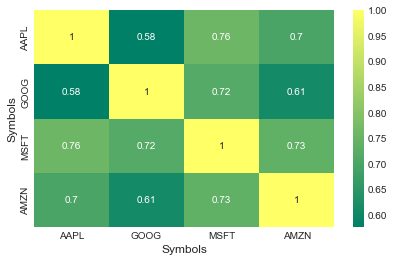

In [47]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

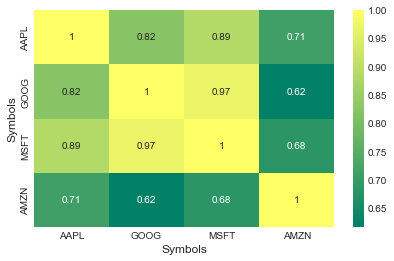

In [48]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

## 5. How much value do we put at risk by investing in a particular stock?

Symbols         AAPL      GOOG      MSFT      AMZN
Date                                              
2020-09-03 -0.080061 -0.050015 -0.061947 -0.046284
2020-09-04  0.000662 -0.030941 -0.014036 -0.021787
2020-09-08 -0.067295 -0.036863 -0.054096 -0.043944
2020-09-09  0.039887  0.016034  0.042584  0.037707
2020-09-10 -0.032646 -0.016018 -0.028018 -0.028605
Index(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype='object', name='Symbols')
Symbols
AAPL    0.000838
GOOG    0.002168
MSFT    0.001195
AMZN    0.000087
dtype: float64
Symbols
AAPL    0.019599
GOOG    0.016401
MSFT    0.015300
AMZN    0.018169
dtype: float64


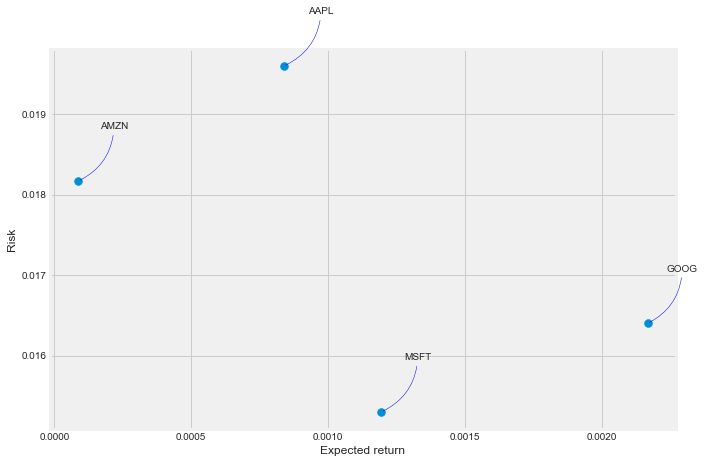

In [57]:
rets = tech_rets.dropna()
print(rets.head())
print(rets.columns)
print(rets.mean())
print(rets.std())

area = np.pi * 20

plt.figure(figsize=(10,7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50,50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
    

## 6. Predicting the closing price stock of APPLE inc:

In [64]:
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610315
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678085
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818838
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952841
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932299
...,...,...,...,...,...,...
2021-08-30,153.490005,148.610001,149.000000,153.119995,90956700.0,153.119995
2021-08-31,152.800003,151.289993,152.660004,151.830002,86453100.0,151.830002
2021-09-01,154.979996,152.339996,152.830002,152.509995,80313700.0,152.509995


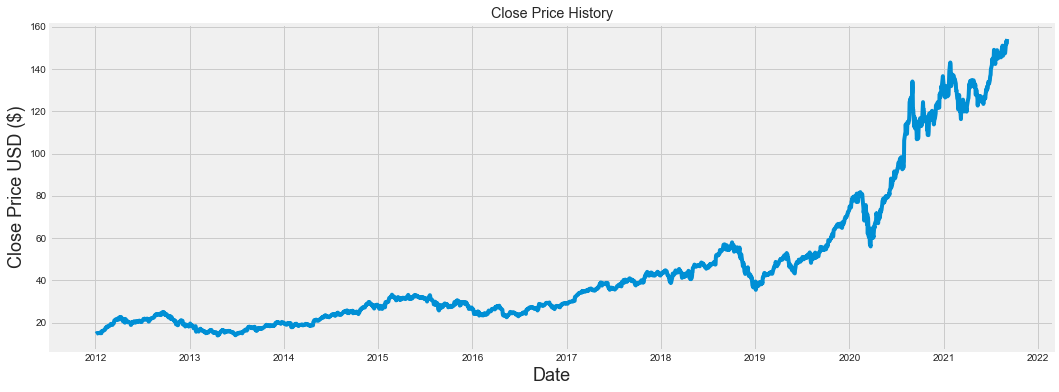

In [65]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [71]:
data = df.filter(['Close'])
dataset = data.values
print(dataset)

training_data_len = int(np.ceil(len(dataset) * .95))
training_data_len

[[ 14.6867857 ]
 [ 14.76571369]
 [ 14.92964268]
 ...
 [152.50999451]
 [153.6499939 ]
 [154.30000305]]


2314

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00526735],
       [0.0058297 ],
       [0.00699768],
       ...,
       [0.98724634],
       [0.99536874],
       [1.        ]])

In [76]:
train_data = scaled_data[0:int(training_data_len), :]
print(train_data)

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[[0.00526735]
 [0.0058297 ]
 [0.00699768]
 ...
 [0.76958014]
 [0.76295397]
 [0.78404371]]
[array([0.00526735, 0.0058297 , 0.00699768, 0.00810968, 0.00793919,
       0.00832343, 0.00814785, 0.00785267, 0.00745062, 0.00869494,
       0.00981712, 0.00947105, 0.00757531, 0.00938453, 0.0076033 ,
       0.01428291, 0.01376636, 0.01444068, 0.01589874, 0.01678172,
       0.01670793, 0.01643566, 0.017596  , 0.01868763, 0.01992432,
       0.02192185, 0.02611791, 0.02618153, 0.02851749, 0.03026308,
       0.02726299, 0.02841824, 0.02839534, 0.03163464, 0.03117406,
       0.0320265 , 0.03355835, 0.03441081, 0.03686636, 0.03865521,
       0.03917177, 0.03935245, 0.03629383, 0.03555588, 0.0356653 ,
       0.03854072, 0.03934991, 0.04108788, 0.0451847 , 0.05065053,
       0.04962759, 0.04963013, 0.05358192, 0.05481861, 0.05393816,
       0.05313408, 0.0522969 , 0.05507815, 0.05698662, 0.05778563])]
[0.05581100193159941]

[array([0.00526735, 0.0058297 , 0.00699768, 0.00810968, 0.00793919,
       0.008

In [84]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

print(x_train.shape)

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=True)) # state false
model.add(LSTM(1, return_sequences=False)) # state false

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

model.fit(x_train, y_train, batch_size=1, epochs=1)

(2254, 60, 1)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 60, 128)           66560     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_8 (Dense)              (None, 25)                1625      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 26        
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


2021-09-04 19:07:37.610036: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


2254/2254 [==============================] - 48s 16ms/step - loss: 0.0020


In [89]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
                  
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse


3.699262892423231

/var/folders/sq/q4m01tvj0416x62xjts0p8jh0000gn/T/ipykernel_47754/3184705827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


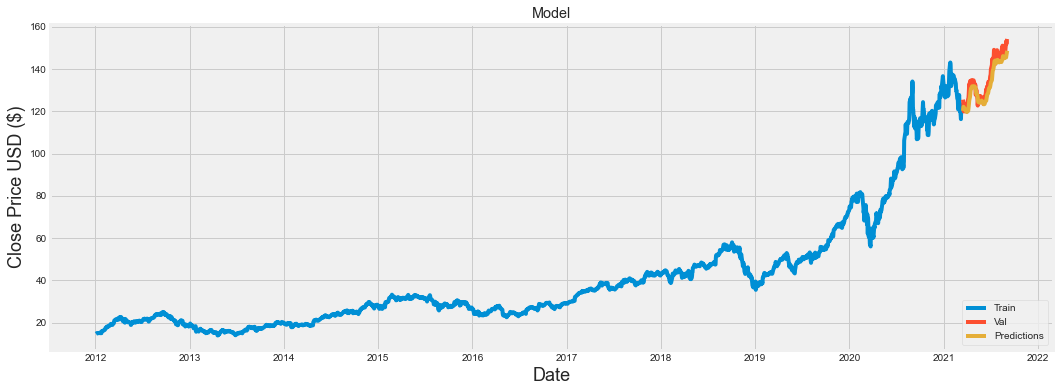

In [90]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [91]:
valid

,Close,Predictions
Date,,
2021-03-16,125.570000,120.262535
2021-03-17,124.760002,121.342400
2021-03-18,120.529999,122.193100
2021-03-19,119.989998,121.991455
2021-03-22,123.389999,121.322739
...,...,...
2021-08-30,153.119995,145.549805
2021-08-31,151.830002,146.415527
2021-09-01,152.509995,147.187561
